In [16]:
# Importing modules to read and visualise data

import numpy as np
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
#Reading the CSV file houses. Houses is a dataset aiming to see what affects house prices
df = pd.read_csv("houses.csv")

df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [18]:
#Deleting unecessary columns

df = df.drop(['grade', 'waterfront','view','zipcode'], axis=1)
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,3.0,1180.0,0.0,1955.0,0.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,3.0,2170.0,400.0,1951.0,1991.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,3.0,770.0,0.0,1933.0,0.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,5.0,1050.0,910.0,1965.0,0.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,3.0,1680.0,0.0,1987.0,0.0,47.6168,-122.045,1800.0,51.00


In [19]:
# Filter out rows with NaN values in the 'lat' and 'long' columns

for i in df.columns:
    df = df.dropna(subset=[i])

df.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,3.0,1180.0,0.0,1955.0,0.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,3.0,2170.0,400.0,1951.0,1991.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,3.0,770.0,0.0,1933.0,0.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,5.0,1050.0,910.0,1965.0,0.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,3.0,1680.0,0.0,1987.0,0.0,47.6168,-122.045,1800.0,51.00


In [20]:
# calculate age of housing and add it to the DataFrame as a new column
df['age'] = 2023 - df['yr_built']

In [21]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price,age
0,3.0,1.00,1180.0,5650.0,1.0,3.0,1180.0,0.0,1955.0,0.0,47.5112,-122.257,1340.0,22.19,68.0
1,3.0,2.25,2570.0,7242.0,2.0,3.0,2170.0,400.0,1951.0,1991.0,47.7210,-122.319,1690.0,53.80,72.0
2,2.0,1.00,770.0,10000.0,1.0,3.0,770.0,0.0,1933.0,0.0,47.7379,-122.233,2720.0,18.00,90.0
3,4.0,3.00,1960.0,5000.0,1.0,5.0,1050.0,910.0,1965.0,0.0,47.5208,-122.393,1360.0,60.40,58.0
4,3.0,2.00,1680.0,8080.0,1.0,3.0,1680.0,0.0,1987.0,0.0,47.6168,-122.045,1800.0,51.00,36.0


In [22]:
#Creating a correlation distribtion to be used in a heatmap

heat_corr = df.corr()

heat_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price,age
bedrooms,1.000000,0.482798,0.559241,0.080920,0.185199,0.056094,0.473182,0.272198,0.130048,0.045829,-0.002473,0.117745,0.405484,0.306886,-0.130048
bathrooms,0.482798,1.000000,0.722383,0.151901,0.465510,-0.079503,0.655316,0.274319,0.501625,0.034624,0.043276,0.272425,0.617032,0.487360,-0.501625
sqft_living,0.559241,0.722383,1.000000,0.228735,0.351308,0.006140,0.861978,0.458924,0.294729,0.051350,0.128400,0.227880,0.807157,0.704948,-0.294729
sqft_lot,0.080920,0.151901,0.228735,1.000000,-0.010792,-0.023364,0.250410,0.011653,0.118462,-0.017932,0.012487,0.286567,0.273712,0.146680,-0.118462
floors,0.185199,0.465510,0.351308,-0.010792,1.000000,-0.201886,0.550499,-0.272861,0.398802,0.031372,0.086412,0.162511,0.289369,0.239497,-0.398802
condition,0.056094,-0.079503,0.006140,-0.023364,-0.201886,1.000000,-0.086372,0.163470,-0.317137,-0.074066,-0.060439,-0.158939,-0.046798,0.073413,0.317137
sqft_above,0.473182,0.655316,0.861978,0.250410,0.550499,-0.086372,1.000000,-0.054825,0.390261,0.024989,0.059706,0.340541,0.763250,0.582805,-0.390261
sqft_basement,0.272198,0.274319,0.458924,0.011653,-0.272861,0.163470,-0.054825,1.000000,-0.103466,0.057344,0.148260,-0.147994,0.252128,0.367061,0.103466
yr_built,0.130048,0.501625,0.294729,0.118462,0.398802,-0.317137,0.390261,-0.103466,1.000000,-0.271667,-0.168763,0.467419,0.341586,0.016690,-1.000000
yr_renovated,0.045829,0.034624,0.051350,-0.017932,0.031372,-0.074066,0.024989,0.057344,-0.271667,1.000000,0.057549,-0.098920,-0.008008,0.146249,0.271667


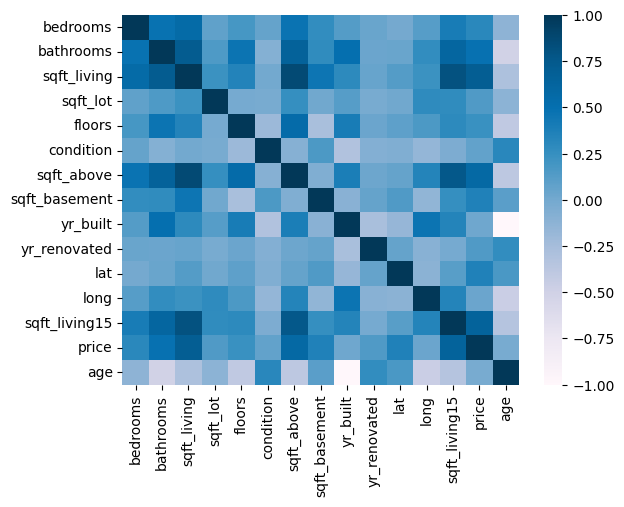

In [23]:
#Heatmaps can tell us quickly what variables have any correlation with each other
#Of course, we want to explore the darkest colours here

heatmap = sns.heatmap(heat_corr, cmap='PuBu')

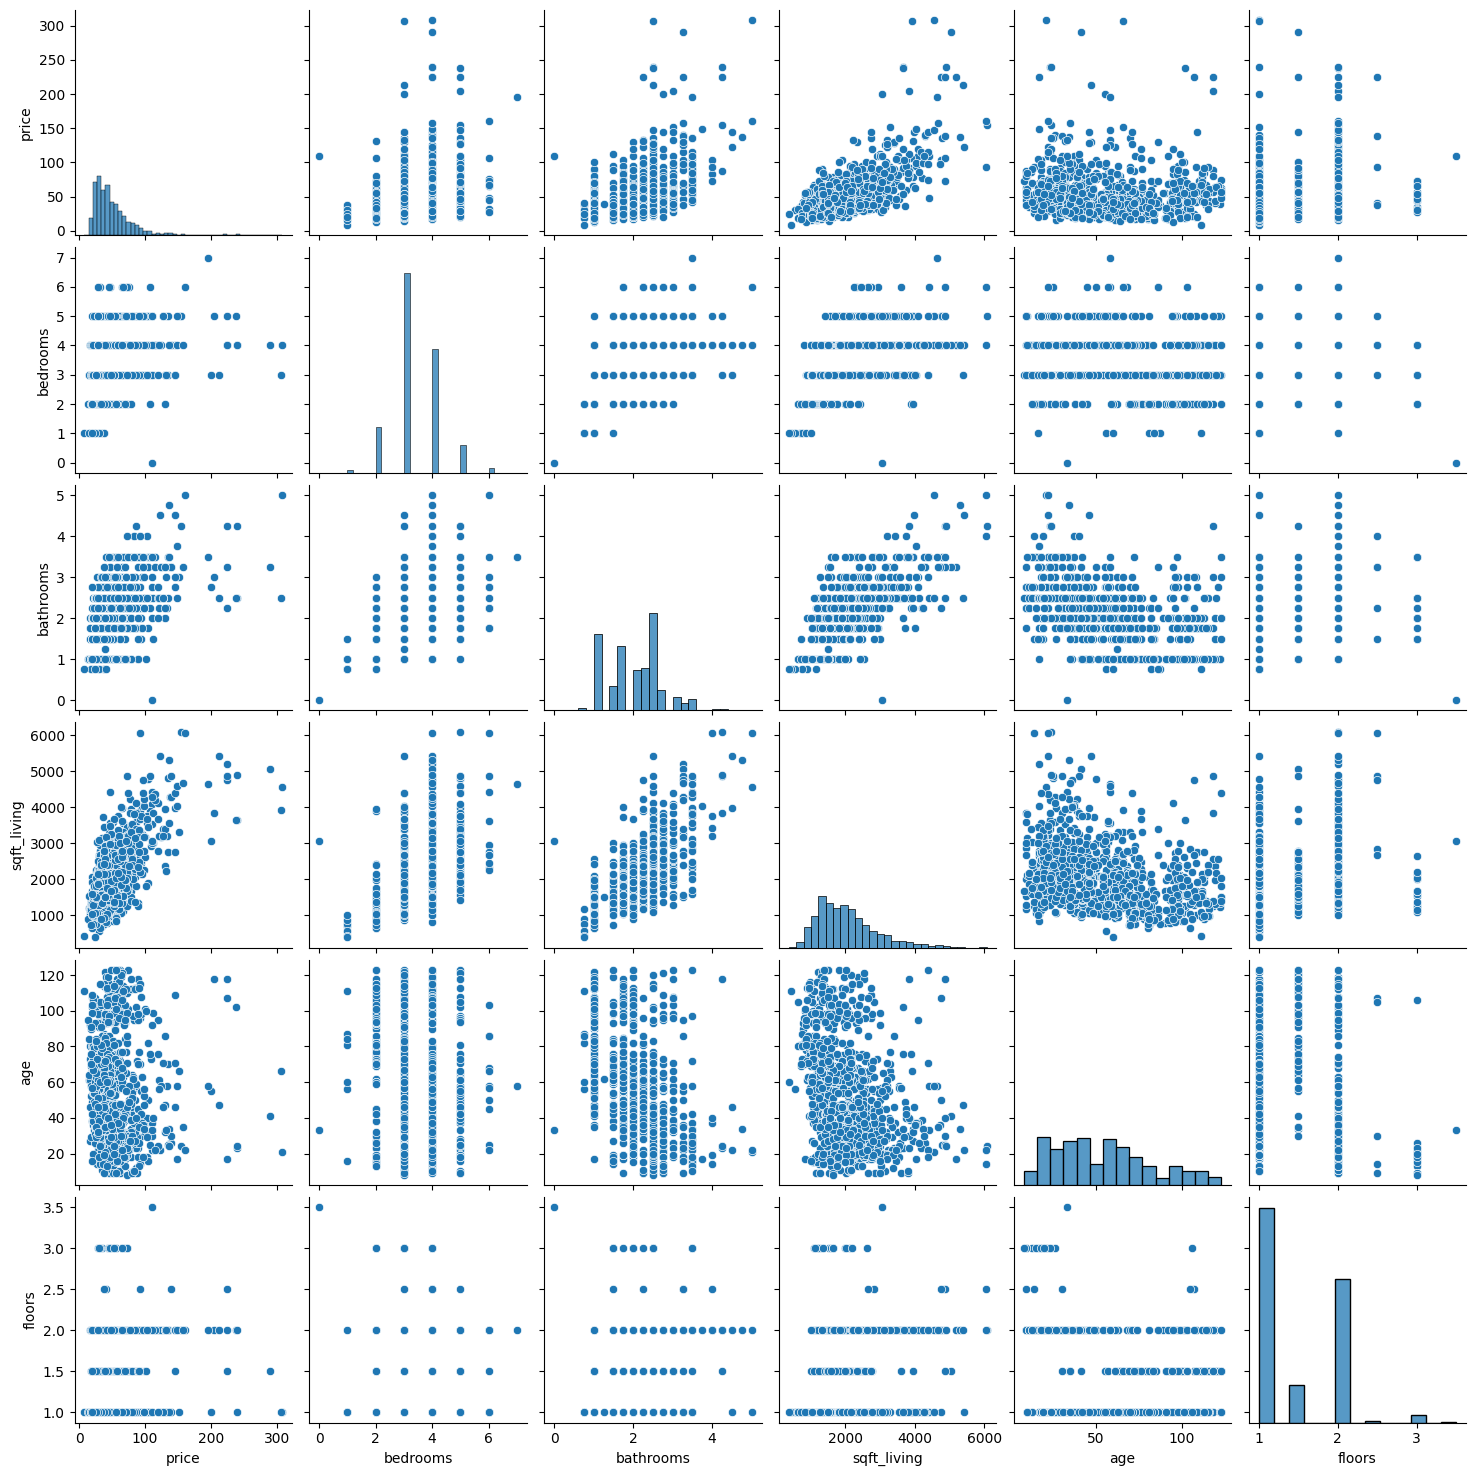

In [24]:
# Seaborn's pairplot gives us many scatterplots of different variables against each other
# This is a good way to see what graphs and variables are worth exploring

pairplot = sns.pairplot(df, vars=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'age', 'floors'])

pairplot

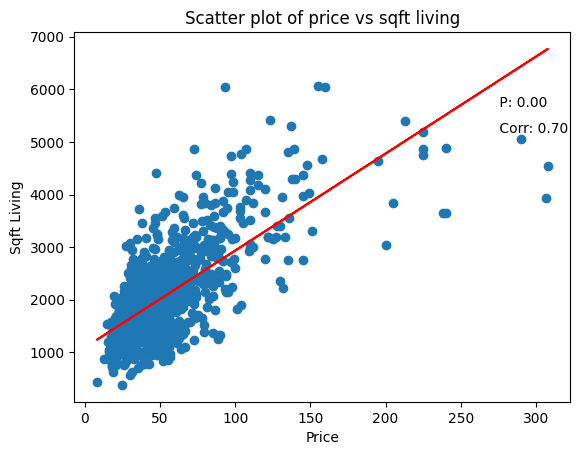

In [25]:
# Some scatterplots extracted from the pairplots
# More information is added to the chart for better data visualisation

plt.scatter(df['price'], df['sqft_living'])

# Add x and y labels
plt.xlabel('Price')
plt.ylabel('Sqft Living')

# Add a line of best fit
slope, intercept, r, p, std_err = stats.linregress(df['price'], df['sqft_living'])
line = slope * df['price'] + intercept
plt.plot(df['price'], line, color='red')

# Add a title
plt.title('Scatter plot of price vs sqft living')

# Add correlation coefficient
corr, p_value = stats.pearsonr(df['price'], df['sqft_living'])
plt.text(df['price'].max() - 35, df['sqft_living'].max() - 900, f" Corr: {corr:.2f}")
plt.text(df['price'].max() - 35, df['sqft_living'].max() - 400, f" P: {p_value:.2f}")

# Show the plot
plt.show()

In [26]:
print(p_value)

6.404339736992558e-151


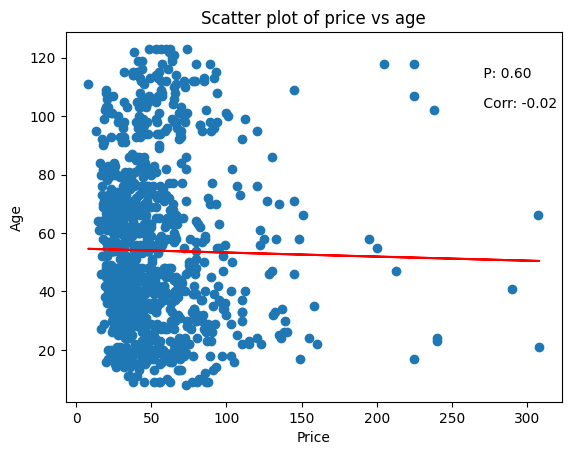

In [27]:
plt.scatter(df['price'], df['age'])

# Add x and y labels
plt.xlabel('Price')
plt.ylabel('Age')

# Add a line of best fit
slope, intercept, r, p, std_err = stats.linregress(df['price'], df['age'])
line = slope * df['price'] + intercept
plt.plot(df['price'], line, color='red')

# Add a title
plt.title('Scatter plot of price vs age')

# Add correlation coefficient
corr_a, p_value_a = stats.pearsonr(df['price'], df['age'])
plt.text(df['price'].max() - 40, df['age'].max() - 20, f" Corr: {corr_a:.2f}")
plt.text(df['price'].max() - 40, df['age'].max() - 10, f" P: {p_value_a:.2f}")

# Show the plot
plt.show()

# It seems age does not have much of a correlation to the house price

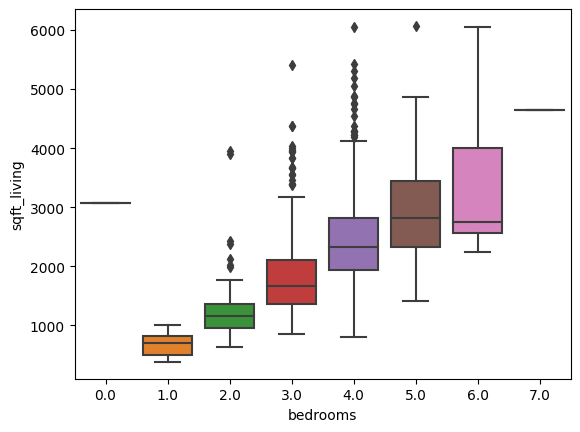

In [28]:
# Boxplots are a good way to see the distribution of the variables together
# We can 

sns.boxplot(x='bedrooms', y='sqft_living', data=df)

plt.show()

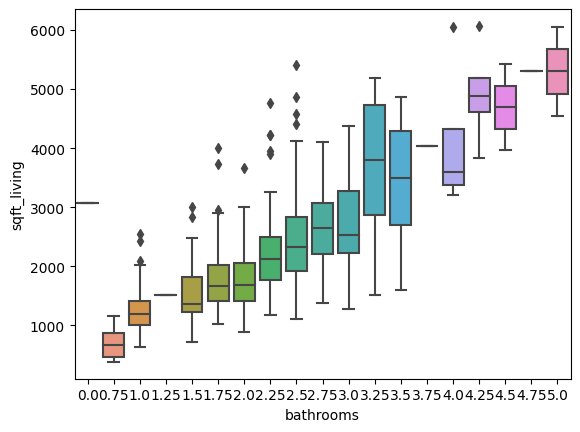

In [29]:
sns.boxplot(x='bathrooms', y='sqft_living', data=df)
plt.show()

In [30]:
# Just a cool data visualisation to see where each house is on the world map
# 

m = folium.Map(location=[df['lat'].iloc[0], df['long'].iloc[0]], zoom_start=12)
# Add a marker for each location in your data
for _, row in df.iterrows():
    folium.Marker(location=[row['lat'], row['long']]).add_to(m)



In [31]:
m


In [32]:
# Split the data into training and testing sets
X = df[['sqft_living', 'age']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
# R2 value of 0.8 means that 80% of the variance in the dependent variable can be explained by the independent variables included in the model.
# RMSE is useful because it gives an idea of how close the predicted values are to the actual values on average.
# For example, an RMSE of 10 means that the average difference between the predicted and actual values is 10 units of the dependent variable.
print('R-squared:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

R-squared: 0.4940494485312197
RMSE: 21.327643381631407


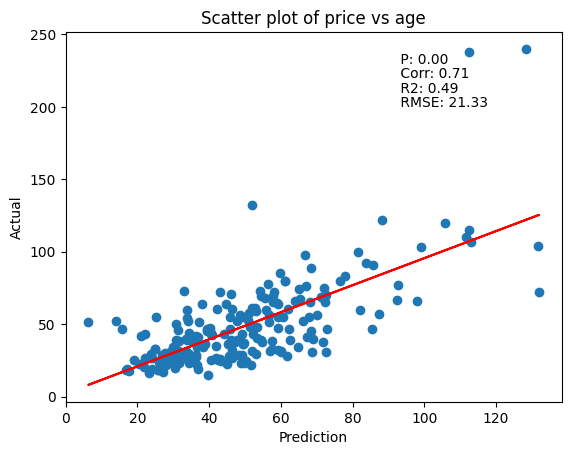

In [33]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')

slope, intercept, r, p, std_err = stats.linregress(y_pred, y_test)
line = slope * y_pred + intercept
plt.plot(y_pred, line, color='red')


plt.title('Scatter plot of the actual prices vs predicted prices')

corr_pred, p_value_pred = stats.pearsonr(y_pred, y_test)
plt.text(y_pred.max() - 40, y_test.max() - 20, f" Corr: {corr_pred:.2f}")
plt.text(y_pred.max() - 40, y_test.max() - 10, f" P: {p_value_pred:.2f}")
plt.text(y_pred.max() - 40, y_test.max() - 30, f" R2: {r2_score(y_test, y_pred):.2f}")
plt.text(y_pred.max() - 40, y_test.max() - 40, f" RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")


plt.show()